## Observe Targets ##
The question is marked by bolded line, and the answer is under the question. I sparated the question related to moon into another notebook. Also, sorry about the mistake, I just realize that I was thought the date is May 1st which is wrong, and it's hard to change the whole notebook for new date, so I keep it here.\
**Partner names** \
Sherr Yang; Yasin Chowdhury \
**Write the object type, and the catalog you’ll be using here:** \
Globular Cluseter \
**Write your observatory assignment & observing window here:** \
McDonald Observatory
2023-04-30 22:01:25 --  2023-05-01 05:44:43

In [2]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_airmass
from astroplan import FixedTarget, Observer
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import pytz
from astroplan import Observer, FixedTarget

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_table("globular_cluster_list.txt",sep='|', index_col=False,)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['name'] = df['name'].str.replace(" ","")

In [5]:
from astroplan import ObservingBlock
from astroplan.constraints import TimeConstraint
from astropy import units as u
from astroplan.scheduling import Transitioner

mcdonald_observatory = Observer(longitude = -104.022 * u.deg,
                    latitude = 30.6714 * u.deg,
                    elevation = 2077 * u.m,
                    timezone = 'US/Central',
                    name = "McDonald Observatory"
                    )

In [6]:
reference_time = Time("2023-05-01")

In [7]:
astro_set = mcdonald_observatory.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise = mcdonald_observatory.twilight_morning_astronomical(reference_time, which='next')
midnight = mcdonald_observatory.midnight(reference_time, which='next')

In [9]:
print("Tonight's observing at MRO starts at {0},\n peaks at {1} and,\n ends at {2} local time"
      .format(astro_set.to_datetime(mcdonald_observatory.timezone),
              midnight.to_datetime(mcdonald_observatory.timezone),
              astro_rise.to_datetime(mcdonald_observatory.timezone)))

Tonight's observing at MRO starts at 2023-04-30 22:01:25.855097-05:00,
 peaks at 2023-05-01 01:53:05.124023-05:00 and,
 ends at 2023-05-01 05:44:43.740932-05:00 local time


In [61]:
midnight

<Time object: scale='utc' format='jd' value=2460065.7868648614>

In [62]:
df['whether_up'] = False

In [63]:
for index, row in df.iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    df.at[index,'whether_up'] = mcdonald_observatory.target_is_up(midnight, target)

**Using more than 20 objects (and less than 100) - determine which of your objects will be visible during your observing window. Upload your code & list to Canvas, and write an explanation of your process here:** 
+ Using the Observer.target_is_up() method to see whether this object is show up or not, we got 41/48 globular clusters will show up. 
+ Then use plot_sky to see location those objects are showing up, pick up those have large altitude and are distant to moon. 
+ Finally plot the airmass plot against those picked objects, to see which one has the smallest airmass through the night. 

In [64]:
df

,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity,whether_up
0,Pal1,,03 33 20.04,+79 34 51.8,13.18,0.96,11.1,-0.65,True
1,NGC6229,,16 46 58.79,+47 31 39.9,9.39,0.70,30.5,-1.47,True
2,NGC6341,M 92,17 17 07.39,+43 08 09.4,6.44,0.63,8.3,-2.31,True
3,NGC2419,,07 38 08.47,+38 52 56.8,10.41,0.66,82.6,-2.15,True
4,NGC6205,M 13,16 41 41.24,+36 27 35.5,5.78,0.68,7.1,-1.53,True
5,Pal2,,04 46 05.91,+31 22 53.4,13.04,2.08,27.2,-1.42,False
6,NGC6779,M 56,19 16 35.57,+30 11 00.5,8.27,0.86,9.4,-1.98,True
7,Pal4,,11 29 16.80,+28 58 24.9,14.20,,108.7,-1.41,True
8,NGC5466,,14 05 27.29,+28 32 04.0,9.04,0.67,16.0,-1.98,True
9,NGC5272,M 3,13 42 11.62,+28 22 38.2,6.19,0.69,10.2,-1.50,True


In [65]:
df = df[df['whether_up'] == True]
df.reset_index(drop=True,inplace=True)

In [66]:
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt
from astroplan import time_grid_from_range

observing_range = [astro_set, astro_rise]
time_grid = time_grid_from_range(observing_range)

In [67]:
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
moon_coord = get_body('moon',midnight)
moon = FixedTarget(name = 'Moon', coord = moon_coord)

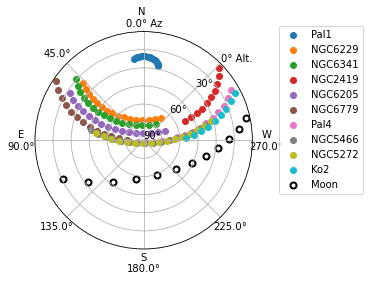

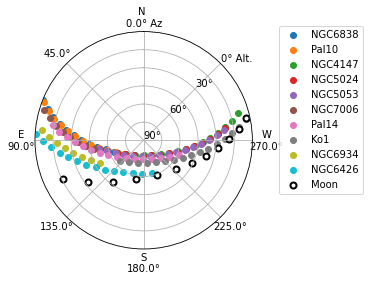

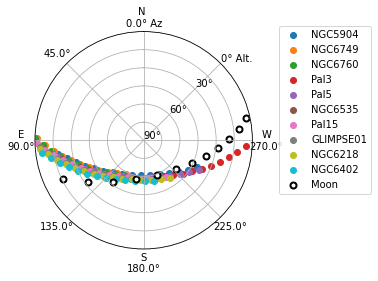

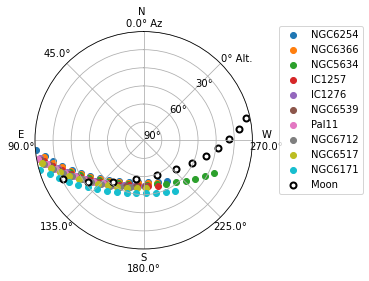

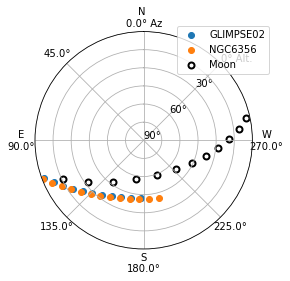

In [68]:
for a in range(0,5):
    #plt.subplot(15 * 10 + a + 1)
    for index, row in df[a * 10 :(a + 1) * 10].iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_sky(target, mcdonald_observatory, time_grid ) 
        ax.plot(label= row['name'])
        
    moon_style = {'color': 'w','marker': 'o','edgecolors' : 'k','linewidth' : 2}
    ax = plot_sky(moon, mcdonald_observatory, time_grid ,style_kwargs = moon_style)
    ax.plot(label= "Moon")
    
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [69]:
arr = ["NGC6205", "NGC5272", "NGC5466","NGC6838","Pal10", "NGC4147", "NGC5024", "NGC5053", "NGC7006"]
df[df['name'].isin(arr)]

,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity,whether_up
4,NGC6205,M 13,16 41 41.24,+36 27 35.5,5.78,0.68,7.1,-1.53,True
7,NGC5466,,14 05 27.29,+28 32 04.0,9.04,0.67,16.0,-1.98,True
8,NGC5272,M 3,13 42 11.62,+28 22 38.2,6.19,0.69,10.2,-1.50,True
10,NGC6838,M 71,19 53 46.49,+18 46 45.1,8.19,1.09,4.0,-0.78,True
11,Pal10,,19 18 02.10,+18 34 18.0,13.22,,5.9,-0.10,True
12,NGC4147,,12 10 06.30,+18 32 33.5,10.32,0.59,19.3,-1.80,True
13,NGC5024,M 53,13 12 55.25,+18 10 05.4,7.61,0.64,17.9,-2.10,True
14,NGC5053,,13 16 27.09,+17 42 00.9,9.47,0.65,17.4,-2.27,True
15,NGC7006,,21 01 29.38,+16 11 14.4,10.56,0.75,41.2,-1.52,True


In [70]:
df = df[df['name'].isin(arr)]
df.reset_index(drop=True,inplace=True)

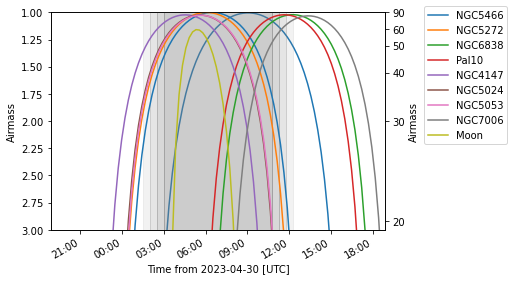

In [71]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass

for index, row in df.iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_airmass(target, mcdonald_observatory , midnight,altitude_yaxis=True) 
        ax.plot(label= row['name'])

ax = plot_airmass(moon, mcdonald_observatory, midnight, brightness_shading=True,altitude_yaxis=True) 

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

Finally I picked up four of those target which has the smallest airmass on the graph.

In [72]:
arr = ["NGC5272", "NGC5466", "NGC4147", "NGC5053"]
df = df[df['name'].isin(arr)]
df.reset_index(drop=True,inplace=True)

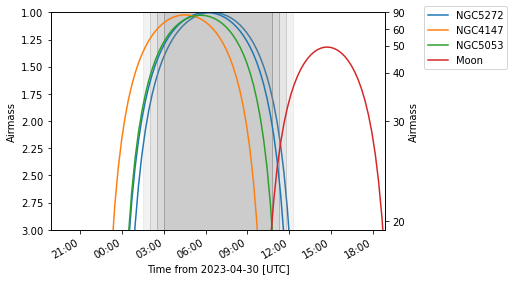

In [79]:
for index, row in df.iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_airmass(target, mcdonald_observatory , midnight,altitude_yaxis=True) 
        #ax.plot(label= row['name'])
ax = plot_airmass(moon_next, mcdonald_observatory, midnight, brightness_shading=True,altitude_yaxis=True) 
#ax.plot(label="Moon")    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

**Your observing run gets clouded out (a tragically commonoccurance) but you’re able to get director’s discretionary time 7 weeks later. Using the same objects you planned to observe initially - will it be better or worse for your same ten objects Explain:**

+ It get worse for target in 2023-06-19, since according to my airmass graph, all the lines are shifted to the left, and only small part is in the night range. all targets are in low altitude and high airmass during the night of June 19th.
+ But it get better  moon effect, since at 06-19 there almost no moon shown up, so its effect is super small

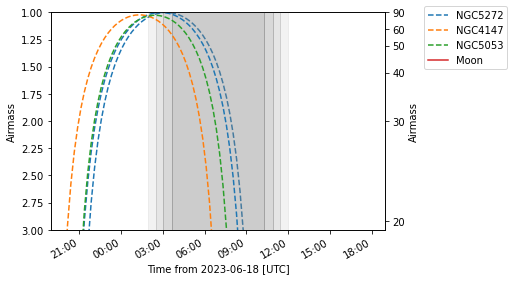

In [77]:
reference_time_next = Time("2023-06-19")
midnight_next = mcdonald_observatory.midnight(reference_time_next, which='next')


moon_coord_next = get_body('moon',midnight_next)
moon_next = FixedTarget(name = 'Moon', coord = moon_coord_next)

style = {'linestyle' : '--'}     

for index, row in df.iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_airmass(target, mcdonald_observatory , midnight_next,altitude_yaxis=True, style_kwargs = style) 
        #ax.plot(label= row['name'] + "Later")

ax = plot_airmass(moon_next, mcdonald_observatory, midnight_next, brightness_shading=True,altitude_yaxis=True) 
#ax.plot(label="Moon")

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
